In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import gzip

In [2]:


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')



In [3]:
df = getDF('reviews_Electronics_5.json.gz')

In [4]:
df.head(25)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5.0,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5.0,This works great but read the details...,1390176000,"01 20, 2014"


In [5]:
def num_votes(arr) :
    return arr[1]

In [6]:
#--TOTAL NO OF RECORDS/REVIEWS IN THE DATASET ----------#

print("Total No. of Reviews: {}".format(len(df)))

Total No. of Reviews: 1689188


In [10]:
print("No of Products : {}".format(df['asin'].nunique()))

No of Products : 63001


In [11]:
print("No of Users : {}".format(df['reviewerID'].nunique()))

No of Users : 192403


In [7]:
#############################################################
#--------MAJOR PARAMETERS FOR THE DATASET ------------------#
MIN_VOTES = 10


#############################################################

In [13]:
print("No of Reviews > {} Votes: {}".format(MIN_VOTES,len(df[df['helpful'].apply(num_votes) >= MIN_VOTES])))


No of Reviews > 10 Votes: 107502


In [8]:
df2 = df[df['helpful'].apply(num_votes) >= MIN_VOTES]


In [9]:
print("No of Products : {}".format(df2['asin'].nunique()))
print("No of Users : {}".format(df2['reviewerID'].nunique()))

No of Products : 32799
No of Users : 54101


In [10]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010"
82,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010"


In [11]:
def helpfulness_score(arr) : 
    if arr[1] >0 :
        return arr[0]/arr[1]
    return 0

In [12]:
helpfulness_score([1,2])

0.5

In [13]:
df2['helpfulness_score'] = df2['helpful'].apply(helpfulness_score)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474
82,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444


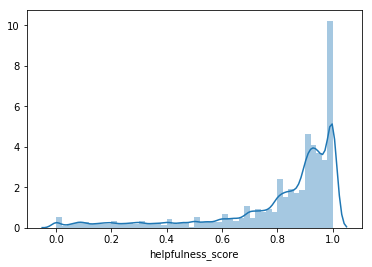

In [27]:
sns.distplot(df2['helpfulness_score'])

In [15]:
df2[df2['helpfulness_score']<0.2]['reviewerID'].nunique()

4487

In [25]:
#----------------

'''
Features be :
User Rating Deviation
No of Positive / Negative Words
Review Length
Rating of the Review

'''

'\nFeatures be :\nUser Rating Deviation\nNo of Positive / Negative Words\nReview Length\nRating of the Review\n\n'

In [16]:
def review_length(s) :
    return len(s.split())

In [17]:
df2['review_length'] = df2['reviewText'].apply(review_length)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df2.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulness_score,review_length
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",0.800000,427
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.955556,846
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.900000,449
56,A3QH8VQDE7HZCR,0972683275,costaricachris,"[15, 19]",Quality was excellent. Instructions were clear...,5.0,Real value for the money,1286236800,"10 5, 2010",0.789474,64
82,A38FGQVJM18OWV,0972683275,"George S. Mitchell ""gsmitchell""","[8, 18]",I checked around Amazon as well as some other ...,1.0,What a piece of junk!,1291161600,"12 1, 2010",0.444444,138


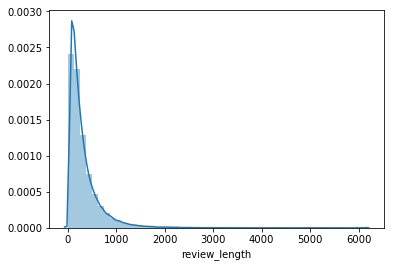

In [19]:
sns.distplot(df2['review_length'])

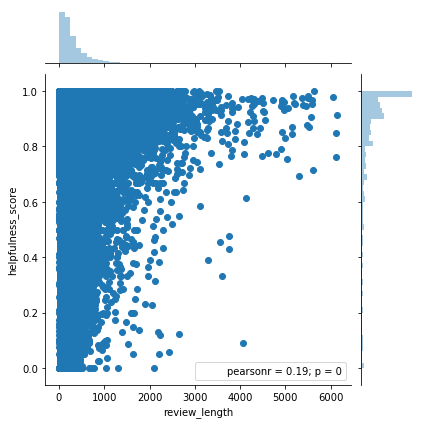

In [21]:
sns.jointplot(x='review_length', y='helpfulness_score', data=df2, kind='scatter')

In [22]:
df2['helpfulness_score'].corr(df2['review_length'])

0.19352055984842575

In [ ]:
Create an average rating for each product
Get unique products
For each product 
    get the reviews of the product
    calculate average rating of the product
    product_profile['avg_rating']= value
Create a dataframe for this
Create a file for this

In [37]:
product_df=df[['asin','overall']].groupby('asin').mean()

In [40]:
#product_df.reset_index(inplace=True)

In [38]:
product_df.head()

,overall
asin,
0528881469,2.400000
0594451647,4.200000
0594481813,4.000000
0972683275,4.461187
1400501466,3.953488


In [47]:
product_df.loc['0528881469']['overall']

2.3999999999999999

In [ ]:
############# GET AUTHOR RATING DEVIATION #########################
#1.for each review calculate rating deviation
#2. groupby user and find mean
#3. Generate the dataframe
#####################################################################
df2['rating_deviation'] = np.nan

for i in range(0,len(df)) :
    review = df2.iloc[i]
    product_id = review['asin']
    rating = review['overall']
    avg_rating = product_df.loc[product_id]['overall']
    deviation = abs(avg_rating-rating)
    
    review['rating_deviation'] = deviation
    

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [40]:
def valuation_formula(product_id,rating):
    avg_rating = product_df.loc[product_id]['overall']
    return abs(rating-avg_rating)

df['rating_deviation'] = df.apply(lambda row: valuation_formula(row['asin'],row['overall']), axis=1)

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,rating_deviation
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",2.6
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",1.4
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0.6
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",0.4
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",1.4


In [50]:
df3 = df[['reviewerID', 'asin', 'rating_deviation']]

In [51]:
df3.to_csv("Reviews_Rating_Deviation")

In [ ]:
df.head()

In [43]:
user_df = df[['reviewerID','rating_deviation']].groupby('reviewerID').mean()

In [44]:
user_df.head()

,rating_deviation
reviewerID,
A000715434M800HLCENK9,1.377000
A00101847G3FJTWYGNQA,0.516270
A00166281YWM98A3SVD55,0.554858
A0046696382DWIPVIWO0K,1.094410
A00472881KT6WR48K907X,0.481824


In [52]:
user_df.to_csv("User_Avg_Rating_Deviation")

In [49]:
user_df[user_df['rating_deviation']>3]

,rating_deviation
reviewerID,
A122BP6MJZL20L,3.062463
A135DQ1W2SWG7R,3.304025
A14RC6K7XX9HOP,3.091103
A1A9AFW68VI907,3.004457
A1CJTPH6BQERSN,3.115098
A1GNHV6L0QRZ9O,3.000406
A1ILBK17KOOOYN,3.205698
A1J0NS46UFSAKG,3.002640
A1NNLMCK3L6RCX,3.096377


In [36]:
'''
products = df.asin.unique()
products_df= pd.DataFrame(data=products,columns=['productID'])

no_of_products = len(products)

for i in range (0,no_of_products):
    pid = products[i]
    p_reviews = df[df['asin']=pid]
    avg_rating = p_reviews['overall'].mean()'''

"\nproducts = df.asin.unique()\nproducts_df= pd.DataFrame(data=products,columns=['productID'])\n\nno_of_products = len(products)\n\nfor i in range (0,no_of_products):\n    pid = products[i]\n    p_reviews = df[df['asin']=pid]\n    avg_rating = p_reviews['overall'].mean()"

In [25]:


Create a file for authors
For each review : Sort by recency of the review
    Calculate rating deviation
    (1-alpha)*curr_avg_rating + alpha * calculated_rating_dev
    

SyntaxError: invalid syntax (<ipython-input-25-aeca1285f956>, line 1)

In [26]:
reviewers = df.reviewerID.unique()

In [29]:
reviewers[0:5]

array(['AO94DHGC771SJ', 'AMO214LNFCEI4', 'A3N7T0DY83Y4IG',
       'A1H8PY3QHMQQA0', 'A24EV6RXELQZ63'], dtype=object)

In [30]:
len(reviewers)

192403

In [31]:
reviewer_profile = pd.DataFrame(data=reviewers,columns=['reviewerID'])

In [32]:
reviewer_profile.head()

,reviewerID
0,AO94DHGC771SJ
1,AMO214LNFCEI4
2,A3N7T0DY83Y4IG
3,A1H8PY3QHMQQA0
4,A24EV6RXELQZ63


In [38]:
reviewer_profile['average_rating_deviation'] = np.NaN

In [39]:
reviewer_profile

,reviewerID,average_rating_deviation
0,AO94DHGC771SJ,NaN
1,AMO214LNFCEI4,NaN
2,A3N7T0DY83Y4IG,NaN
3,A1H8PY3QHMQQA0,NaN
4,A24EV6RXELQZ63,NaN
5,A2JXAZZI9PHK9Z,NaN
6,A2P5U7BDKKT7FW,NaN
7,AAZ084UMH8VZ2,NaN
8,AEZ3CR6BKIROJ,NaN
9,A3BY5KCNQZXV5U,NaN


In [36]:
for reviewer in reviewers :
    

SyntaxError: unexpected EOF while parsing (<ipython-input-36-06877d607d04>, line 2)

In [41]:
df[df['asin']=='0132793040']

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime


In [3]:
meta_df = getDF('meta_Electronics.json.gz')

In [4]:
meta_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


,asin,imUrl,description,categories,title,price,salesRank,related,brand


In [20]:
k

Series([], Name: categories, dtype: object)

In [17]:
for i in k:
    print (i)

[['Electronics', 'GPS & Navigation', 'Vehicle GPS', 'Trucking GPS']]


In [24]:
df['categories']

0         [[Electronics, Computers & Accessories, Cables...
1         [[Electronics, Computers & Accessories, Cables...
2         [[Electronics, Computers & Accessories, PDAs, ...
3         [[Electronics, Accessories & Supplies, Audio &...
4         [[Electronics, GPS & Navigation, Vehicle GPS, ...
5         [[Electronics, Accessories & Supplies, Audio &...
6         [[Electronics, eBook Readers & Accessories, Po...
7         [[Electronics, eBook Readers & Accessories, Sk...
8         [[Electronics, eBook Readers & Accessories, Co...
9         [[Electronics, eBook Readers & Accessories, Co...
10        [[Electronics, eBook Readers & Accessories, Co...
11        [[Electronics, eBook Readers & Accessories, Co...
12        [[Electronics, Computers & Accessories, Touch ...
13        [[Electronics, eBook Readers & Accessories, Co...
14        [[Electronics, Accessories & Supplies, Audio &...
15        [[Electronics, Computers & Accessories, Touch ...
16        [[Electronics, eBook Readers &

In [5]:
meta_df.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [8]:
meta_df['asin'].nunique()

498196

In [9]:
df['asin'].nunique()

63001

In [11]:
current_products = df['asin']

In [52]:


meta2_df = meta_df[meta_df['asin'].isin(current_products)]

In [53]:
meta2_df['asin'].nunique()

63001

In [54]:
meta2_df.tail(10)

,asin,imUrl,description,categories,title,price,salesRank,related,brand
497660,B00KSLCU72,http://ecx.images-amazon.com/images/I/41wlybKm...,FosPower FUSE Universal World Travel USB AC Ad...,"[[Electronics, Accessories & Supplies, Batteri...",FosPower FUSE World-Wide Universal AC Adapter ...,7.99,NaN,"{'also_bought': ['B00JJOEV9Y', 'B00L8HA5L8', '...",NaN
497739,B00KVNY2KA,http://ecx.images-amazon.com/images/I/417lJxa9...,The Satechi Spectrum Mouse Wired Optical Mouse...,"[[Electronics, Computers & Accessories, Cables...",Satechi Spectrum Mouse Wired Optical Mouse (Si...,24.99,NaN,"{'also_viewed': ['B00LIBH4YK', 'B00CJKW4WQ', '...",NaN
497759,B00KWHMR6G,http://ecx.images-amazon.com/images/I/41phatTV...,,"[[Electronics, Computers & Accessories, Networ...",NETGEAR AC3200 Nighthawk X6 Tri-Band WiFi Rout...,299.99,{},"{'also_bought': ['B008I64O78', 'B008I64EKA', '...",Netgear
497781,B00KXAFYZS,http://ecx.images-amazon.com/images/I/31A7Qct1...,The Blurex Wireless-N USB Adapter Outdoor Wifi...,"[[Electronics, Computers & Accessories, Networ...",Blurex High Power 1000Mw Wireless-N Wifi Adapt...,36.99,NaN,"{'also_viewed': ['B00LFOZ0M8', 'B00K1FZ64Y', '...",NaN
497830,B00KYMCJF8,http://ecx.images-amazon.com/images/I/518oN4Vz...,"Omaker-Open your mind,we are the makerOmaker B...","[[Electronics, Portable Audio & Video, MP3 Pla...",Omaker M3-Outdoor Sport Rugged Square Design S...,29.99,{},"{'also_bought': ['B00J0CVVGQ', 'B00KQCJ0CG', '...",NaN
497900,B00L2442H0,http://ecx.images-amazon.com/images/I/51NFBdDZ...,Description:Add up to 4 peripherals quickly an...,"[[Electronics, Computers & Accessories, Networ...",Sabrent 4 Port Portable USB 2.0 Hub (9.5&quot;...,5.99,{'Electronics': 1383},"{'also_bought': ['B00IRV2DL8', 'B00GU8OIYA', '...",Sabrent
497904,B00L26YDA4,http://ecx.images-amazon.com/images/I/41061q4C...,Description:The Sabrent Wifi Receiver lets you...,"[[Electronics, Car & Vehicle Electronics, Vehi...",Sabrent Wifi Audio Receiver (Supports DLNA and...,35.99,{'Cell Phones & Accessories': 6139},"{'also_bought': ['B00KB5QEYK', 'B00L2JQ8AE', '...",Sabrent
497905,B00L21HC7A,http://ecx.images-amazon.com/images/I/513kT0it...,Description:The Sabrent CR-CCU3 3-Slot Card Re...,"[[Electronics, Computers & Accessories, Cables...",Sabrent USB 3.0 SuperSpeed 3 slot Memory Card ...,14.99,{},"{'also_viewed': ['B00GAKX34E', 'B00L2442H0', '...",Sabrent
497926,B00L3YHF6O,http://ecx.images-amazon.com/images/I/41SBx7QY...,"Mind-Shattering Performance, Precision-Tuned F...","[[Electronics, Home Audio, Stereo Components, ...",NEW! Creative Sound Blaster Roar: Portable NFC...,149.99,{'Cell Phones & Accessories': 131},"{'also_bought': ['B00LBNW2TC', 'B00L8I6SFY', '...",NaN
498163,B00LGQ6HL8,http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN


In [15]:
meta2_df.count()

asin           63001
imUrl          62957
description    61286
categories     63001
title          61820
price          58969
salesRank      21293
related        60682
brand          29751
dtype: int64

In [16]:
### Save the Product Info of the reviews
meta2_df.to_csv("meta_data")

In [47]:
meta2_df = pd.read_csv("meta_data")

In [33]:
## User Quickness

for each product get the time of first review
store it
for each review subtract its time and the time of first review
Find the average quickness of the authors /reviewers / users


In [55]:
meta2_df['categories'].iloc[0][0]

['Electronics', 'GPS & Navigation', 'Vehicle GPS', 'Trucking GPS']

In [56]:
def remove_array(arr):
    return arr[0][1:]

In [57]:
meta2_df['categories'] = meta2_df['categories'].apply(remove_array)

C:\Users\Trishul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
type(meta2_df['categories'].iloc[0])

list

In [60]:
category_set = set()

In [61]:
category_set.add('Electronics')

In [62]:
category_set.remove('Electronics')

In [63]:
category_set

set()

In [65]:
s1 = set([1,2,3])
l1 = [1,2,3,4]
s1.update(l1)
print(s1)

{1, 2, 3, 4}


In [66]:
def add_to_set(arr) :
    category_set.update(arr)

In [68]:
meta2_df['categories'].apply(add_to_set)

4         None
15        None
20        None
38        None
53        None
54        None
56        None
57        None
59        None
61        None
62        None
64        None
65        None
67        None
83        None
127       None
132       None
135       None
189       None
206       None
215       None
229       None
265       None
266       None
275       None
283       None
294       None
299       None
303       None
314       None
          ... 
497230    None
497259    None
497262    None
497312    None
497315    None
497361    None
497366    None
497370    None
497383    None
497447    None
497489    None
497491    None
497492    None
497496    None
497520    None
497546    None
497547    None
497549    None
497550    None
497570    None
497660    None
497739    None
497759    None
497781    None
497830    None
497900    None
497904    None
497905    None
497926    None
498163    None
Name: categories, Length: 63001, dtype: object

In [70]:
len(category_set)

735

In [73]:
category_list  = list(category_set)

In [76]:
category_list[:20]

['Fuses',
 'SCSI Port Cards',
 'Video Studio',
 'Barking-Dog Alarms',
 'Traffic Message Channel (TMC) Receiver Modules',
 'Cell Phones',
 'Telescope & Microscope Accessories',
 'eBook Readers & Accessories',
 'Motorcycle Bluetooth Headsets',
 'Luggage & Travel Gear',
 'Voice Dialers',
 'Video Projector Accessories',
 'Home Audio Crossovers & Parts',
 'Presentation Supplies',
 'APS Cameras',
 'Component Amplifiers',
 'Mounts',
 'Graphics Tablets',
 'Guiders & Wedges',
 'Power Packs']

In [77]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [78]:
firstreview_df=df[['asin','unixReviewTime']].groupby('asin').min()

In [79]:
firstreview_df.head()

,unixReviewTime
asin,
0528881469,1283990400
0594451647,1388707200
0594481813,1369440000
0972683275,1203379200
1400501466,1322697600


In [80]:
def delay_calculate(product_id,review_time):
    first_review = firstreview_df.loc[product_id]['unixReviewTime']
    return review_time-first_review

df['review_delay'] = df.apply(lambda row: delay_calculate(row['asin'],row['unixReviewTime']), axis=1)

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_delay
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",86140800
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",6652800
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",6566400
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",33264000


In [81]:
## FINDING AVERAGE DELAY OF EACH USER IN GIVING A REIVEW WITH RESPECT TO FIRST REVIEW

userdelay_df = df[['reviewerID','review_delay']].groupby('reviewerID').mean()

In [88]:
userdelay_df.head()

,review_delay
reviewerID,
A000715434M800HLCENK9,7.053696e+07
A00101847G3FJTWYGNQA,2.897280e+07
A00166281YWM98A3SVD55,3.172608e+07
A0046696382DWIPVIWO0K,5.211648e+07
A00472881KT6WR48K907X,3.721371e+07


In [92]:
df['helpfulness_score'] = df['helpful'].apply(helpfulness_score)

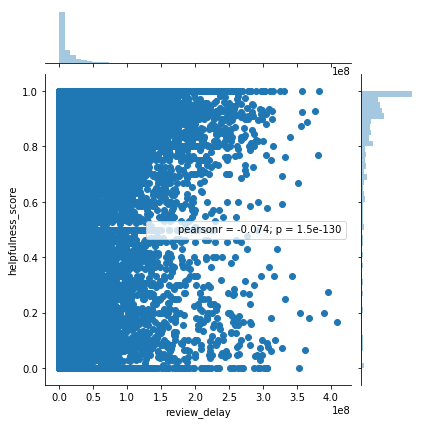

In [99]:
sns.jointplot(x='review_delay', y='helpfulness_score', data=df2, kind='scatter')

In [100]:
df['reviewerID'].nunique()

192403

In [101]:
len(df)

1689188

In [102]:
1689188/192403

8.779426516218562

In [105]:
len(userdelay_df)

192403

In [119]:
def get_delay(reviewerID):
    return userdelay_df.loc[reviewerID][0]

In [107]:
userdelay_df.head()

,review_delay
reviewerID,
A000715434M800HLCENK9,7.053696e+07
A00101847G3FJTWYGNQA,2.897280e+07
A00166281YWM98A3SVD55,3.172608e+07
A0046696382DWIPVIWO0K,5.211648e+07
A00472881KT6WR48K907X,3.721371e+07


In [116]:
v=userdelay_df.loc['A00101847G3FJTWYGNQA']

In [118]:
print(v[0])

28972800.0


In [120]:
df['user_delay'] = df.apply(lambda row: get_delay(row['reviewerID']), axis=1)


In [121]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,review_delay,helpfulness_score,user_delay
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",86140800,0.000000,6.615771e+07
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",6652800,0.800000,4.660416e+07
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",0,0.955556,3.105360e+07
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",6566400,0.900000,5.736175e+07
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",33264000,0.000000,6.333120e+07


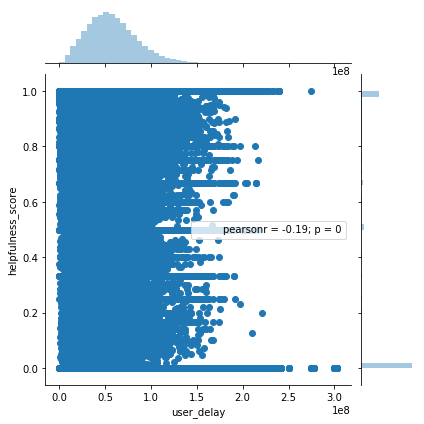

In [122]:
sns.jointplot(x='user_delay', y='helpfulness_score', data=df, kind='scatter')

In [132]:
df['reviewText'][6]

'The cable is very wobbly and sometimes disconnects itself.The price is completely unfair and only works with the Nook HD and HD+'

In [1]:
np.nan

NameError: name 'np' is not defined